In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Используемые функции

1) Функция реализации сигмоиды

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

In [2]:
def sigmoid(x, w=1):
    return 1 / (1 + np.exp(-w*x))

2) Функция реализации вычисления потерь

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}{\sigma( -\left \langle w,x_{i} \right \rangle)}  + (1 - y_{i})\text{ln}({1 - \sigma( -\left \langle w,x_{i} \right \rangle)}).$$

In [3]:
def log_loss(w, X, y):

    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / X.shape[1] * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / X.shape[1] * np.dot(X, (A - y).T)
    
    return loss, grad

3) Градиентный спуск
$$w_{n+1} = w_{n} - \eta \frac{1}{l}X(\sigma(-wx)-Y)^{T},$$

In [4]:
def optimize(w, X, y, n_iterations, eta):
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

4) Предсказание

In [5]:
def predict(w, X, p = 0.5):
    
    y_predicted = np.zeros((1, X.shape[1]))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
    for i in range(A.shape[1]):
        if (A[:,i] > p): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= p):
            y_predicted[:, i] = 0
    
    return y_predicted

# Создание и подготовка данных

    1) Создаём данные.
    2) Перемешивваем данные, чтобы не было случайных закономерностей.
    3) Разделяем данные на тренировочную и тестовую выборки.

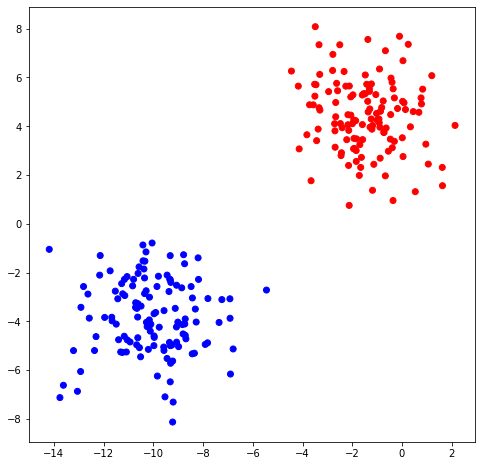

In [10]:
#classes = datasets.make_classification(n_samples=250, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
data = datasets.make_blobs(n_samples = 250, centers = 2, cluster_std = 1.5, random_state=1)

# print(data)

colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in data[0]], [x[1] for x in data[0]], c=data[1], cmap=colors)

In [11]:
np.random.seed(12)
shuffle_index = np.random.permutation(data[0].shape[0])
X, y = data[0][shuffle_index], data[1][shuffle_index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
    
print("Размер обучающей выборки", X_train.shape)
print("Размер тестовой выборки", X_test.shape)

Размер обучающей выборки (175, 2)
Размер тестовой выборки (75, 2)


In [12]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

# Обучение

In [181]:
w0 = np.zeros((X_train_tr.shape[0], 1))

maximum = 0
maxi = 0
maxj = 0
summary = len(range(100, 1001, 100)) * len(range(1, 41, 1))
count = 0

for i in range(100, 1001, 100):
    for j in range(1, 41, 1):
        n_iterations = i
        eta = j*0.01

        w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

        y_predicted_train = predict(w, X_train_tr)
        y_predicted_test = predict(w, X_test_tr)

        train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
        test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)
        accuracy = train_accuracy + test_accuracy

        count += 1
        print(f"\ni: {i}   j: {j}   accuracy: {round(accuracy/2, 3)}    {round(count * 100 / summary, 2)} %", end="   ")
        if accuracy > maximum:
            if maximum != 0:
                print(f"maximum: {round(accuracy/2, 3)}", end="   ")
            maximum = accuracy
            maxi = i
            maxj = j

print("")
print("Results:")
print(f"n_iterations = {maxi}   eta = {maxj*0.01}")
print(f"test_accuracy: {maximum/2}")


i: 100   j: 1   accuracy: 98.095    0.25 %   
i: 100   j: 2   accuracy: 97.429    0.5 %   
i: 100   j: 3   accuracy: 97.429    0.75 %   
i: 100   j: 4   accuracy: 97.429    1.0 %   
i: 100   j: 5   accuracy: 97.429    1.25 %   
i: 100   j: 6   accuracy: 97.429    1.5 %   
i: 100   j: 7   accuracy: 97.429    1.75 %   
i: 100   j: 8   accuracy: 97.429    2.0 %   
i: 100   j: 9   accuracy: 97.429    2.25 %   
i: 100   j: 10   accuracy: 97.429    2.5 %   
i: 100   j: 11   accuracy: 97.429    2.75 %   
i: 100   j: 12   accuracy: 97.429    3.0 %   
i: 100   j: 13   accuracy: 97.429    3.25 %   
i: 100   j: 14   accuracy: 97.429    3.5 %   
i: 100   j: 15   accuracy: 97.429    3.75 %   
i: 100   j: 16   accuracy: 97.429    4.0 %   
i: 100   j: 17   accuracy: 97.429    4.25 %   
i: 100   j: 18   accuracy: 97.429    4.5 %   
i: 100   j: 19   accuracy: 97.429    4.75 %   
i: 100   j: 20   accuracy: 97.429    5.0 %   
i: 100   j: 21   accuracy: 97.429    5.25 %   
i: 100   j: 22   accuracy: 97.4

i: 500   j: 15   accuracy: 98.095    43.75 %   
i: 500   j: 16   accuracy: 98.095    44.0 %   
i: 500   j: 17   accuracy: 98.095    44.25 %   
i: 500   j: 18   accuracy: 98.095    44.5 %   
i: 500   j: 19   accuracy: 98.095    44.75 %   
i: 500   j: 20   accuracy: 98.095    45.0 %   
i: 500   j: 21   accuracy: 98.095    45.25 %   
i: 500   j: 22   accuracy: 98.095    45.5 %   
i: 500   j: 23   accuracy: 98.095    45.75 %   
i: 500   j: 24   accuracy: 98.095    46.0 %   
i: 500   j: 25   accuracy: 98.095    46.25 %   
i: 500   j: 26   accuracy: 98.095    46.5 %   
i: 500   j: 27   accuracy: 98.095    46.75 %   
i: 500   j: 28   accuracy: 98.095    47.0 %   
i: 500   j: 29   accuracy: 98.095    47.25 %   
i: 500   j: 30   accuracy: 98.095    47.5 %   
i: 500   j: 31   accuracy: 98.762    47.75 %   
i: 500   j: 32   accuracy: 98.762    48.0 %   
i: 500   j: 33   accuracy: 98.762    48.25 %   
i: 500   j: 34   accuracy: 98.762    48.5 %   
i: 500   j: 35   accuracy: 98.762    48.75 %   
i:

i: 900   j: 29   accuracy: 98.762    87.25 %   
i: 900   j: 30   accuracy: 98.762    87.5 %   
i: 900   j: 31   accuracy: 98.762    87.75 %   
i: 900   j: 32   accuracy: 98.762    88.0 %   
i: 900   j: 33   accuracy: 98.762    88.25 %   
i: 900   j: 34   accuracy: 98.762    88.5 %   
i: 900   j: 35   accuracy: 98.762    88.75 %   
i: 900   j: 36   accuracy: 98.762    89.0 %   
i: 900   j: 37   accuracy: 98.762    89.25 %   
i: 900   j: 38   accuracy: 98.762    89.5 %   
i: 900   j: 39   accuracy: 98.762    89.75 %   
i: 900   j: 40   accuracy: 98.762    90.0 %   
i: 1000   j: 1   accuracy: 97.429    90.25 %   
i: 1000   j: 2   accuracy: 97.429    90.5 %   
i: 1000   j: 3   accuracy: 97.429    90.75 %   
i: 1000   j: 4   accuracy: 97.429    91.0 %   
i: 1000   j: 5   accuracy: 97.429    91.25 %   
i: 1000   j: 6   accuracy: 97.429    91.5 %   
i: 1000   j: 7   accuracy: 98.095    91.75 %   
i: 1000   j: 8   accuracy: 98.095    92.0 %   
i: 1000   j: 9   accuracy: 98.095    92.25 %   
i:

In [13]:
# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 400
eta = 0.4

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_train = predict(w, X_train_tr)
y_predicted_test = predict(w, X_test_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print("Итоговый вектор весов w:")
print(w)
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w:
[[-0.27732379]
 [-2.3207893 ]]
Точность на обучающей выборке: 100.000
Точность на тестовой выборке: 100.000


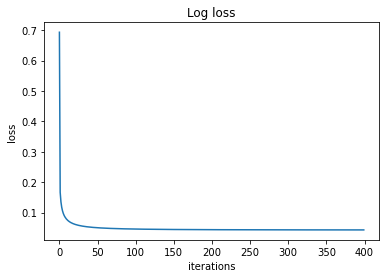

In [183]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

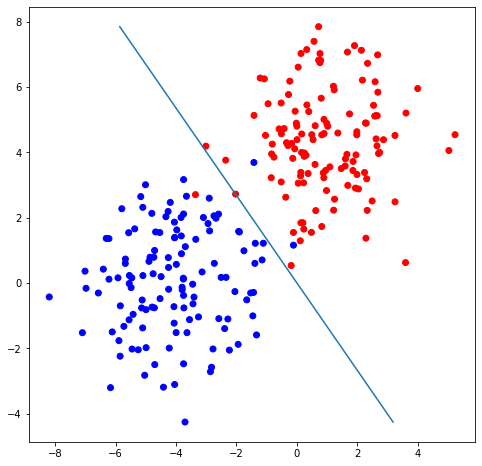

In [184]:
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in data[0]], [x[1] for x in data[0]], c=data[1], cmap=colors)

values_x = [x[0] for x in data[0]]
values_y = [x[1] for x in data[0]]

a, b = -w[1][0]*min(values_y)/w[0][0], -w[1][0]*max(values_y)/w[0][0]
x = np.linspace(max(min(values_x), min(a, b)), min(max(values_x), max(a, b)), 50)

y = -w[0][0]*x/w[1][0]
plt.plot(x, y) 